# from medium.com/markitosanches, with NEURAL NETWORK KERAS TENSERFLOW

In [71]:
import pandas as pd


In [72]:
data = pd.read_csv("housepricedata.csv");
data

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


# the last column is the feature that we would like to predict 
# -> is the house price above the median or not?(1 for yes and 0 for no)

# machine learning model process vectors, so it is necessary to convert the data into a array

In [73]:
dataset = data.values
dataset # this is how the output look like

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

# In next step is to split the data into input resources "X" and the resource to be predicted "y"
# "X" would be columns 1 to 10, while "y" would be columns 11. 

In [74]:
X = dataset[:,0:10]
X.shape

(1460, 10)

In [75]:
Y = dataset[:,10]
Y.shape

(1460,)

# Normalizing the data set.
# The idea of normalization is to adjust measured values at different,scales to a common nominal scale,
# usually before average. One way to scale the data is to use an existing scikit-learn package.
# We will use a function called min-max scaler, which scales the dataset so that all the input resources are between 0 and 1.

In [76]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


#  New we need to split data for training, testing and validation.
# In scikit-learn, we will import the train_test_split function to do this.
# The test size will be 30% and from the test size we will use 50% as validation.
# This mean train size will be 70%, the test size 15% and validation size 15%

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# train and test set (30%)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

# validation test (50% of test set)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [79]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building a Neural Network

# the first step in building a neural network is to define the architecture.

In [84]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.train import AdamOptimizer
from tensorflow.core.example.feature_pb2 import Feature
import tensorflow as tf
#from keras.models import Sequential
#from keras.layers import Dense

In [85]:
from tensorflow import train
print (train)

<module 'tensorflow_core._api.v2.train' from 'C:\\Users\\bayya\\Anaconda3\\lib\\site-packages\\tensorflow_core\\_api\\v2\\train\\__init__.py'>


In [86]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(10,)))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss='mean_squared_error', metrics=['accuracy'])

In [87]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [88]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 11,301
Trainable params: 11,301
Non-trainable params: 0
_________________________________________________________________


In [90]:
exeu = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 6s 6ms/sample - loss: 0.2265 - accuracy: 0.5910 - val_loss: 0.2004 - val_accuracy: 0.8082
Epoch 2/100
1022/1022 [==============================] - 0s 177us/sample - loss: 0.1671 - accuracy: 0.8229 - val_loss: 0.1510 - val_accuracy: 0.7900
Epoch 3/100
1022/1022 [==============================] - 0s 135us/sample - loss: 0.1271 - accuracy: 0.8434 - val_loss: 0.1280 - val_accuracy: 0.8356
Epoch 4/100
1022/1022 [==============================] - 0s 108us/sample - loss: 0.1088 - accuracy: 0.8640 - val_loss: 0.1154 - val_accuracy: 0.8539
Epoch 5/100
1022/1022 [==============================] - 0s 129us/sample - loss: 0.1010 - accuracy: 0.8689 - val_loss: 0.1171 - val_accuracy: 0.8311
Epoch 6/100
1022/1022 [==============================] - 0s 113us/sample - loss: 0.0941 - accuracy: 0.8826 - val_loss: 0.1077 - val_accuracy: 0.8584
Epoch 7/100
1022/1022 [==============================] - 0s 1

1022/1022 [==============================] - 0s 141us/sample - loss: 0.0541 - accuracy: 0.9354 - val_loss: 0.0929 - val_accuracy: 0.8721
Epoch 56/100
1022/1022 [==============================] - 0s 132us/sample - loss: 0.0518 - accuracy: 0.9315 - val_loss: 0.0926 - val_accuracy: 0.8721
Epoch 57/100
1022/1022 [==============================] - 0s 131us/sample - loss: 0.0554 - accuracy: 0.9295 - val_loss: 0.0943 - val_accuracy: 0.8630
Epoch 58/100
1022/1022 [==============================] - 0s 124us/sample - loss: 0.0563 - accuracy: 0.9266 - val_loss: 0.0934 - val_accuracy: 0.8813
Epoch 59/100
1022/1022 [==============================] - 0s 124us/sample - loss: 0.0501 - accuracy: 0.9344 - val_loss: 0.0904 - val_accuracy: 0.8858
Epoch 60/100
1022/1022 [==============================] - 0s 134us/sample - loss: 0.0534 - accuracy: 0.9227 - val_loss: 0.0914 - val_accuracy: 0.8813
Epoch 61/100
1022/1022 [==============================] - 0s 127us/sample - loss: 0.0513 - accuracy: 0.9344 - val

In [91]:
model.evaluate(X_test, Y_test)

219/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.09907890922606807, 0.84931505]

In [93]:
exeu.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

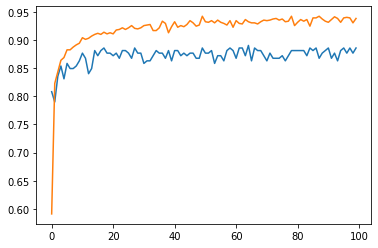

In [96]:
import matplotlib.pyplot as plt
plt.plot(exeu.history['val_accuracy'])
plt.plot(exeu.history['accuracy'])

In [105]:
# run prediction at local
prediction = model.predict(X_test[[15]])
prediction

array([[0.9825209]], dtype=float32)